#<center> SWIGGY ANALYSIS  </center>

**Aim:** To find out the customer preferences through various metrics (like Delivery Time, Price and Ratings) and how to improve its quality by leveraging productivity and sales turnover.

The Dataset have 10 attributes which are:

1. ID
2. Area
3. City
4. Restaurant
5. Price
6. Avg ratings
7. Total ratings
8. Food type
9. Address
10. Delivery Time



## ABOUT THE DATASET

This gives an overview about the dataset

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("swiggy.csv")
df.head()

,ID,Area,City,Restaurant,Price,Avg ratings,Total ratings,Food type,Address,Delivery time
0,211,Koramangala,Bangalore,Tandoor Hut,300.0,4.4,100,"Biryani,Chinese,North Indian,South Indian",5Th Block,59
1,221,Koramangala,Bangalore,Tunday Kababi,300.0,4.1,100,"Mughlai,Lucknowi",5Th Block,56
2,246,Jogupalya,Bangalore,Kim Lee,650.0,4.4,100,Chinese,Double Road,50
3,248,Indiranagar,Bangalore,New Punjabi Hotel,250.0,3.9,500,"North Indian,Punjabi,Tandoor,Chinese",80 Feet Road,57
4,249,Indiranagar,Bangalore,Nh8,350.0,4.0,50,"Rajasthani,Gujarati,North Indian,Snacks,Desser...",80 Feet Road,63


In [ ]:
## datatype

df.dtypes

,0
ID,int64
Area,object
City,object
Restaurant,object
Price,float64
Avg ratings,float64
Total ratings,int64
Food type,object
Address,object
Delivery time,int64


In [ ]:
## Total Number of Food Types

df['Food type'].nunique()

3734

In [ ]:
## Total Number of Restaurants

df['Restaurant'].nunique()

7865

In [ ]:
## Total Number of Customers

df['ID'].nunique()

8680

## PRICE INSIGHTS ON CITIES

In [ ]:
## Identify which cities have higher-priced orders

df.groupby('City')['Price'].max().sort_values(ascending=False)


,Price
City,
Bangalore,2500.0
Chennai,2500.0
Mumbai,2500.0
Pune,2000.0
Hyderabad,1700.0
Delhi,1650.0
Kolkata,1600.0
Ahmedabad,1500.0
Surat,978.0


In [ ]:
## Cities with the lower priced orders

df.groupby('City')['Price'].min().sort_values(ascending=False)

,Price
City,
Delhi,20.0
Bangalore,15.0
Kolkata,10.0
Hyderabad,2.0
Mumbai,1.0
Pune,1.0
Ahmedabad,0.0
Chennai,0.0
Surat,0.0


- Cities with Price = 0 should be investigated, for further analysis

In [ ]:
## The Areas with the least price and takes time

df[df['Price'] < 5]

,ID,Area,City,Restaurant,Price,Avg ratings,Total ratings,Food type,Address,Delivery time
1054,48742,Chembur,Mumbai,230 Celsius,1.0,4.1,100,Italian Continental,Tilak Nagar,60
1393,73662,Annanagar East,Chennai,Mozza,0.0,2.9,80,"Continental,Chinese,Italian,Mexican",Annangar East,64
2830,283144,Athwa,Surat,Monginis,0.0,2.9,80,Desserts,Udhyognagar,46
5030,408696,Charminar,Hyderabad,Tajis Food Court,2.0,2.9,80,Indian South Indian Chinese Arabian,Charminar,68
5871,443938,Swargate,Pune,Wok N Roll,1.0,2.9,80,"Chinese,Snacks",Swargate,39
6125,451785,T Nagar,Chennai,Murugappa Mess,1.0,2.9,80,"South Indian,Indian,Desserts",T Nagar,73
6371,463545,George Town,Chennai,Food Corner Family Restaurent,1.0,2.9,80,"South Indian,Chinese,Beverages",George Town,60
6995,55365,Isanpur,Ahmedabad,Maruti Dhosa Hub,0.0,4.1,20,South Indian,Vishal Nagar,49
6999,55710,Paldi,Ahmedabad,Ladli Fast Food,0.0,3.5,20,"Fast Food,Italian",Paldi,34
7218,77391,Ghodasar,Ahmedabad,Comfy Restaurant,0.0,4.0,100,"Indian,Chinese",Isanpur,48


Here, in the above table it gives a clear analysis about the customer behaviour trends towards the preferences:

We see a correlation or a relationship between the Ratings and Price



<Axes: xlabel='Price', ylabel='Avg ratings'>

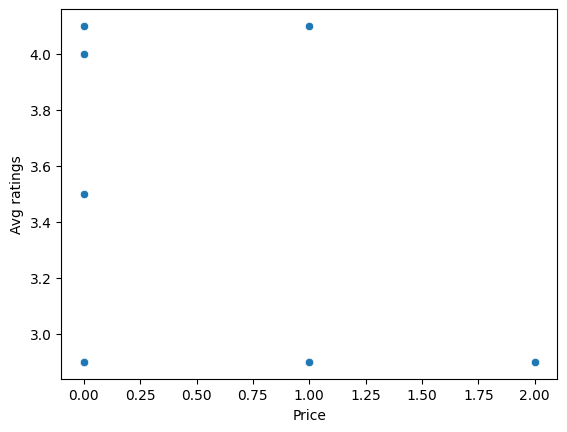

In [ ]:
##  scatter plot between the price and avg rating when price is lesser than 5

sns.scatterplot(x='Price',y='Avg ratings',data=df[df['Price']<5])


**OBSERVATION:**


From the above plot it is no correlation model, but by taking as groups between INR 0-2 is having below 3.0 this can be due to negative parameters like

- The **dissatisfaction with the food** type being delivered which might have been given back the amount refunded where in cash transactions there might have been certain amount as tipping given to the ordered restaurants

- Also the swiggy service, might have been below the expectation, where the refund policy might have been strengthen in areas like Hyderabad, Pune and Chennai as the metrics like **traffic congesions, delivery delay status and feedbacks on certain delivery executive** might have brought to this decision.

Also there are certain cities that takes measures on strengthening their refunding policies which might have been a core factor on giving higher ratings like above 3.5 to 4.1 with INR 0-1

- Mumbai has been one area that have greatly involved in empowering their delivery schemes timely but if late they have kept a **zero-pay policy** towards the customers ensuring their timely delivery timetable which is also the same as Ahmedabad with a crowded citizens having 3 orders have kept out the same stratergy which can attract more customers into this platform by ensurig their higher food security and quality enhancement that ensures more autenticity in these areas.


## CHENNAI AREA INVESTIGATION (BASED ON DELIVERY TIME)


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.11/dist-packages/matplotlib/pyplot.py'>

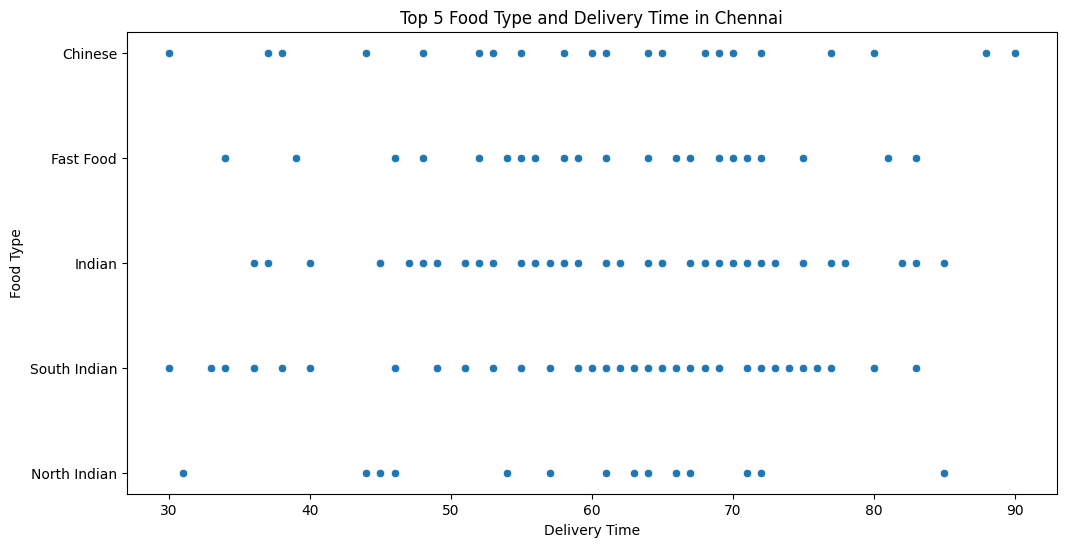

In [ ]:
## Top 5 Food Type and Delivery Time in Chennai Scatter PLot

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Filter data for Chennai
chennai_df = df[df['City'] == 'Chennai']

# Get top 5 food types in Chennai
top_5_food_types = chennai_df['Food type'].value_counts().head(5).index

# Filter data for top 5 food types
chennai_top5_df = chennai_df[chennai_df['Food type'].isin(top_5_food_types)]

# Create scatter plot
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Delivery time', y='Food type', data=chennai_top5_df)
plt.title('Top 5 Food Type and Delivery Time in Chennai')
plt.xlabel('Delivery Time')
plt.ylabel('Food Type')
plt

**OBSERVATIONS:**

Most of the Time taken for  delivery in Chennai is between the range of 50-75 minutes this is due to its density on population and its land mass area where certain remote areas also acts in certain important roles for the delay in delivery. Especially, take the Chinese Cuisines that are for delivery schemes between 80 and 90 minutes which take more time as there might be areas that there is no more access options where the person need to take speed limit in highways for this areas to ensure more quick and easier delivery.

In [ ]:
## Total areas being districuted in Chennai

chennai_df = df[df['City'] == 'Chennai']

# Get unique areas in Chennai
chennai_areas = chennai_df['Area'].unique()

# Calculate the total number of unique areas
total_areas = len(chennai_areas)

# Print the result
print(f"Total areas being distributed in Chennai: {total_areas}")

Total areas being distributed in Chennai: 79


<ipython-input-12-b69859a8715e>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Area', y='ID', data=area_order_counts, palette='viridis')  # Added color palette


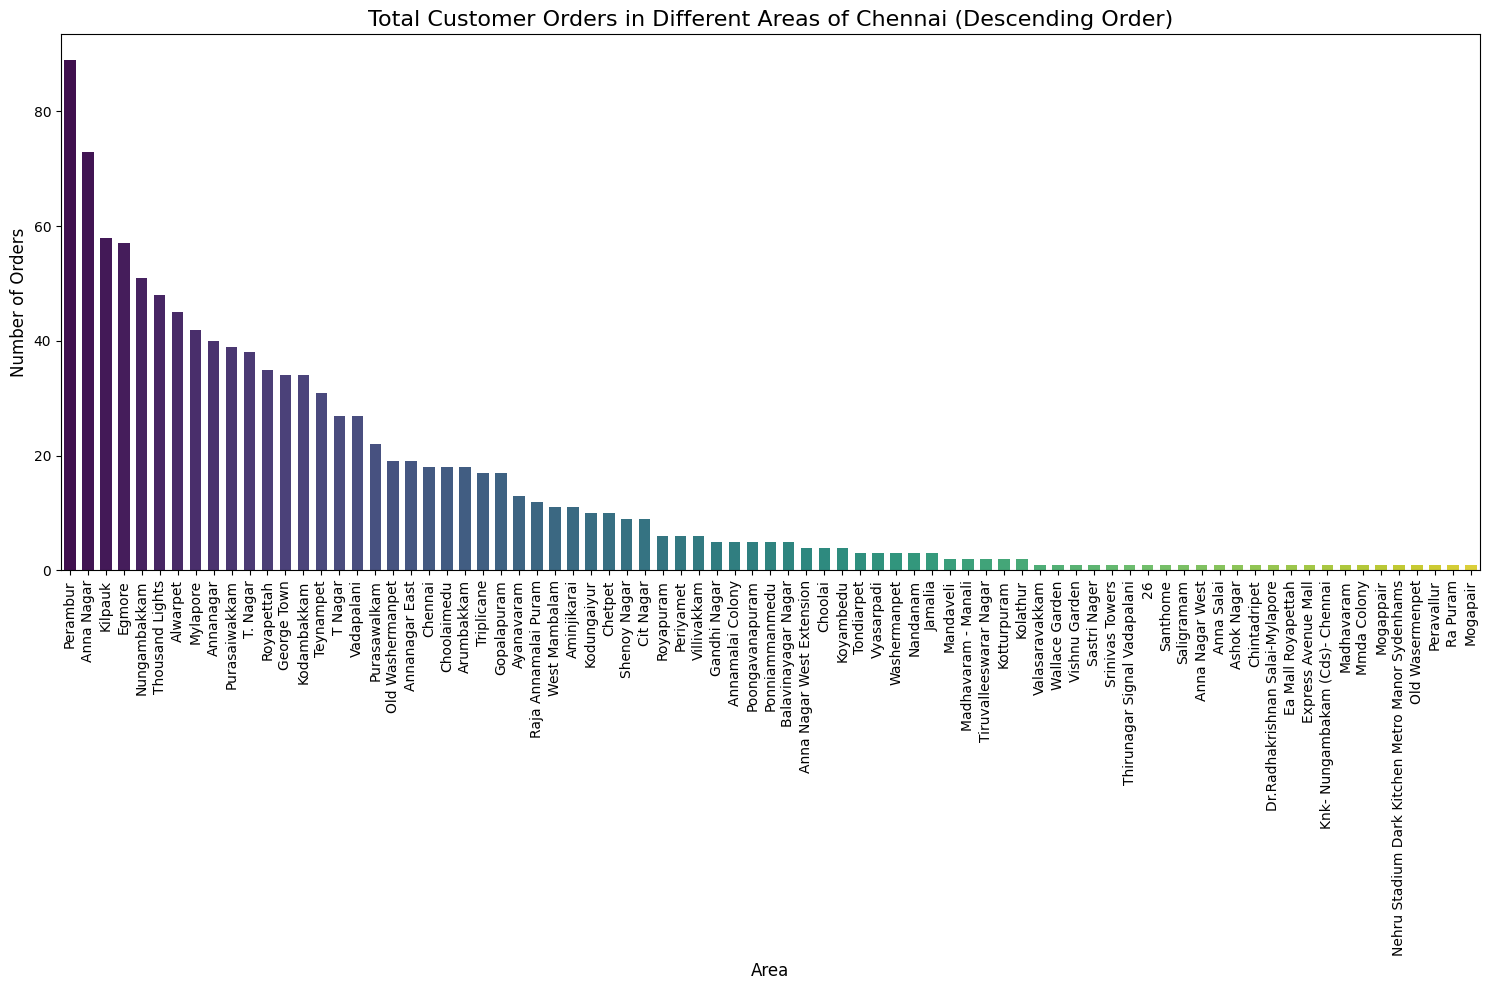

In [ ]:
## Total Customers orders involved in areas of Chennai

# Group by area and count orders, then sort in descending order
area_order_counts = chennai_df.groupby('Area')['ID'].count().sort_values(ascending=False).reset_index()

# Create bar graph using Seaborn with customizations
plt.figure(figsize=(15, 10))  # Increased figure size for better visibility
ax = sns.barplot(x='Area', y='ID', data=area_order_counts, palette='viridis')  # Added color palette

# Add spacing between bars
for bar in ax.patches:
    width = bar.get_width()
    bar.set_width(width * 0.8)  # Reduced bar width for spacing
    center = bar.get_x() + width / 2
    bar.set_x(center - width * 0.8 / 2)  # Recenter bars

plt.title('Total Customer Orders in Different Areas of Chennai (Descending Order)', fontsize=16)  # Increased title font size
plt.xlabel('Area', fontsize=12)  # Increased x-axis label font size
plt.ylabel('Number of Orders', fontsize=12)  # Increased y-axis label font size
plt.xticks(rotation=90, fontsize=10)  # Rotated and adjusted x-axis tick font size
plt.tight_layout()
plt.show()


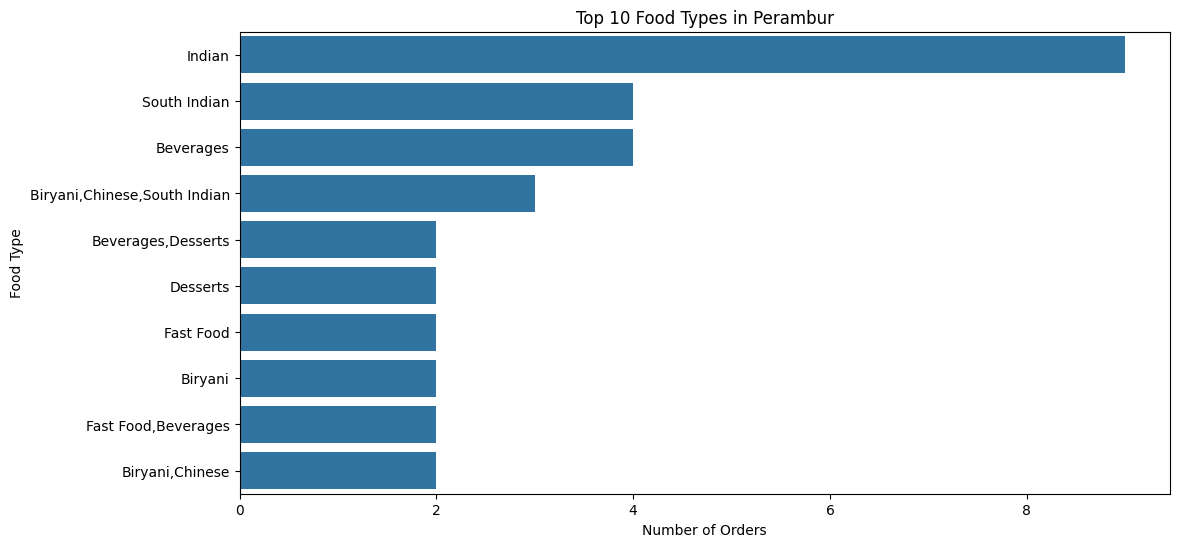

In [ ]:

## Top 10 food type in Perambur
perambur_df = df[df['Area'] == 'Perambur']

# Get top 10 food types in Perambur
top_10_food_types = perambur_df['Food type'].value_counts().head(10).index

# Filter data for top 10 food types
perambur_top10_df = perambur_df[perambur_df['Food type'].isin(top_10_food_types)]

# Create bar chart
plt.figure(figsize=(12, 6))
sns.countplot(y='Food type', data=perambur_top10_df, order=top_10_food_types)  # Order by top 10
plt.title('Top 10 Food Types in Perambur')
plt.xlabel('Number of Orders')
plt.ylabel('Food Type')
plt.show()

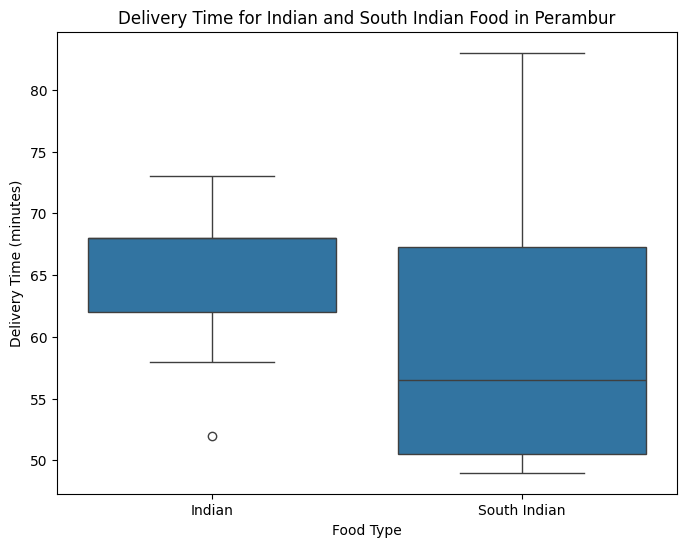

In [ ]:
## Delivery Time Taken in perambur for Indian and South Indian

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Filter data for Perambur and Indian/South Indian food types
filtered_df = df[(df['Area'] == 'Perambur') & (df['Food type'].isin(['Indian', 'South Indian']))]

# Create boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(x='Food type', y='Delivery time', data=filtered_df)
plt.title('Delivery Time for Indian and South Indian Food in Perambur')
plt.xlabel('Food Type')
plt.ylabel('Delivery Time (minutes)')
plt.show()

**OBSERVATIONS:**

In Perambur, the demand for Indian and South Indian cuisines is particularly high due to the demographic mix, with many young IT professionals seeking diverse Indian options. Delivery times average between 60-70 minutes, influenced by traffic congestion and peak order volumes. South Indian dishes are slightly faster to deliver (50-55 minutes), given their preparation ease and availability. However, delays persist even in accessible locations due to crowded roads and high demand. Actions by food delivery platforms to optimize logistics and address delays are crucial to improving customer satisfaction in this area.

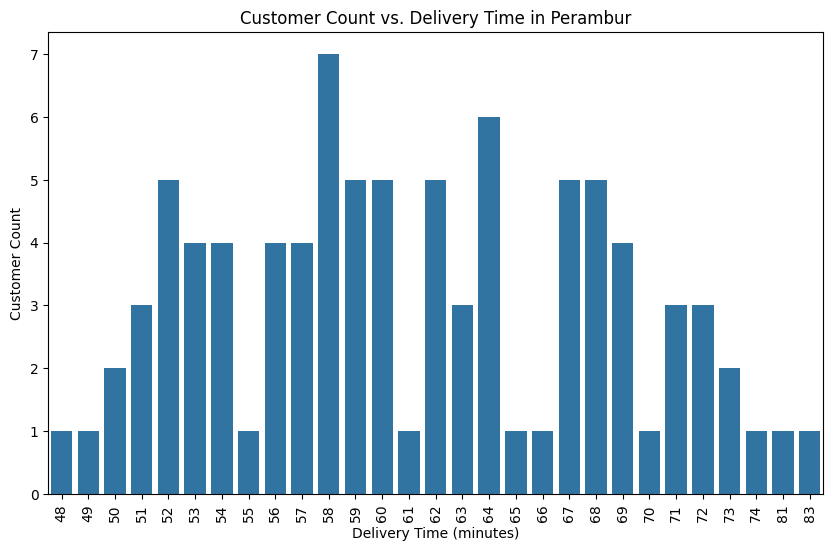

In [ ]:
## Perambur Area with the customer count on delivery time

delivery_time_counts = perambur_df.groupby('Delivery time')['ID'].count().reset_index()
# Create bar graph
plt.figure(figsize=(10, 6))
sns.barplot(x='Delivery time', y='ID', data=delivery_time_counts)
plt.title('Customer Count vs. Delivery Time in Perambur')
plt.xlabel('Delivery Time (minutes)')
plt.ylabel('Customer Count')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()

**OBSERVATIONS:**

With the relationship of the Number of Customer Orders and the delivery time taken.

- One part of it tells us about the more time taken for more customers and on the other more time taken for lesser customer orders.

- Here it can be observed that the minimum delivery time for each area is around 48 minutes and maximum is around 83 minutes.

- Most of the customers will order from South Indian type cuisines which may be a bit far from usual that can take more time as it might be in the outskirts of the city that can account to more time 60-80 minutes when it can be a person.

- Also when more customers start ordering from the same food type the waiting and delivery time can matter or vary from place to place. In the plot it is shown that most of the people are taking approxiamately 1 hour for 6-7 orders on a timely basis, which is a good sign where each of the orders can be more nearer but due to the traffic concerns within the area and the address may be taking more time for the delivery to be late.

- At the same time, orders with 1-2 customers can be acting as an outliers where the order time can be different and also the location will be too remote for a delivery person to identify its address and the tracking device for the customers might be poor due to its internet speed which can cause lesser customers in that particular locatility even though in that same area is ordering.

## **PRICE INSIGHTS ON CHENNAI**

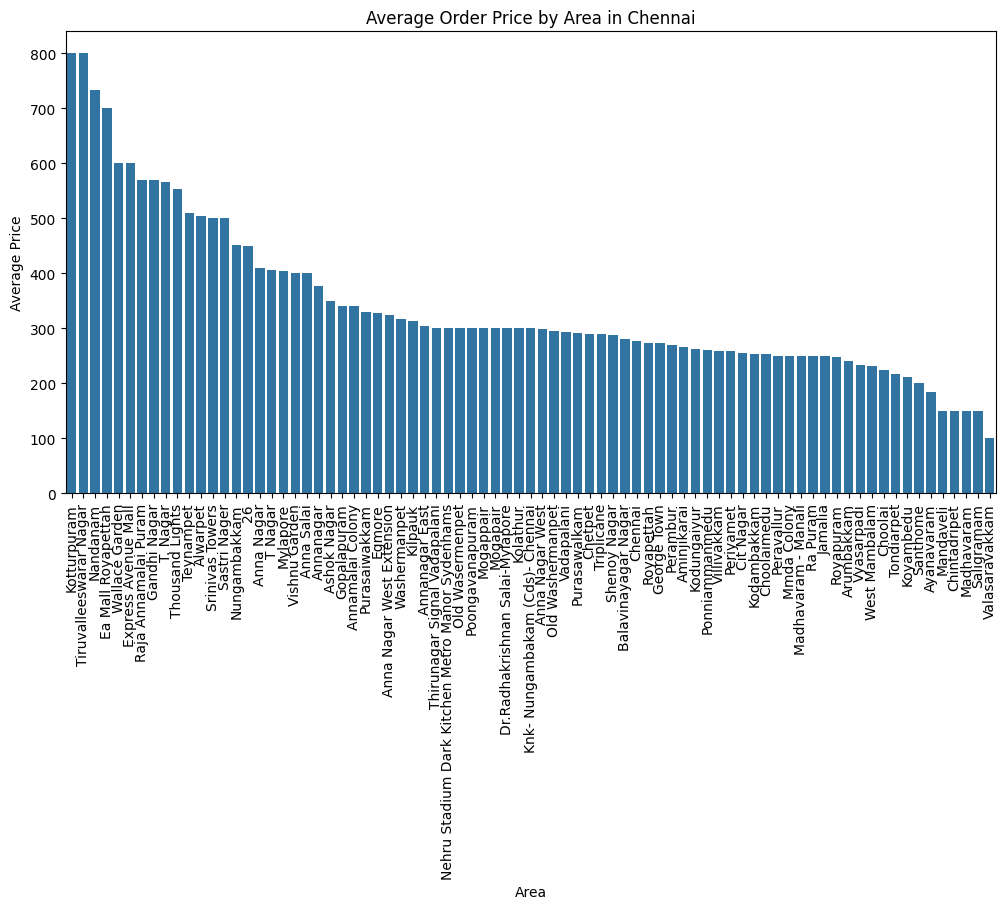

In [ ]:
## price distribution on areas of Chennai

import matplotlib.pyplot as plt
import seaborn as sns

area_price_distribution = chennai_df.groupby('Area')['Price'].mean().sort_values(ascending=False)

plt.figure(figsize=(12, 6))  # Adjust figure size as needed
sns.barplot(x=area_price_distribution.index, y=area_price_distribution.values)
plt.title('Average Order Price by Area in Chennai')
plt.xlabel('Area')
plt.ylabel('Average Price')
plt.xticks(rotation=90)
plt.show()



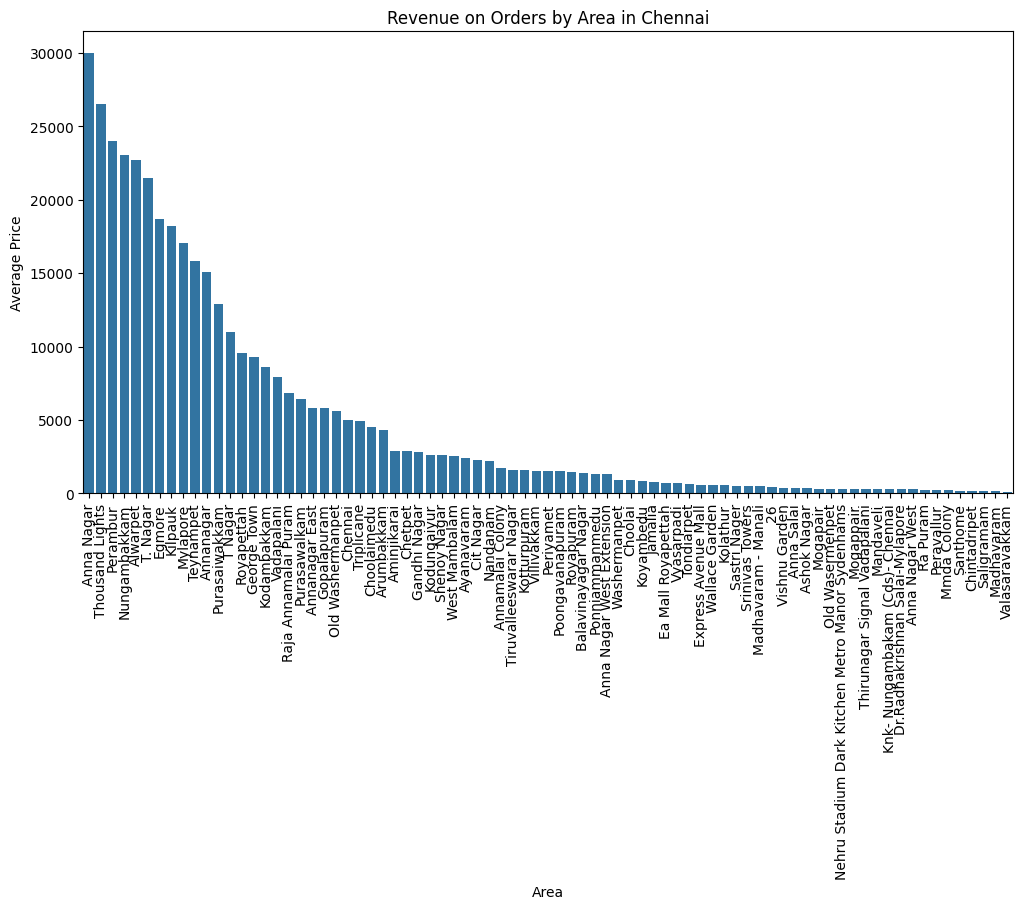

In [ ]:
area_revenue_distribution = chennai_df.groupby('Area')['Price'].sum().sort_values(ascending=False)

plt.figure(figsize=(12, 6))  # Adjust figure size as needed
sns.barplot(x=area_revenue_distribution.index, y=area_revenue_distribution.values)
plt.title('Revenue on Orders by Area in Chennai')
plt.xlabel('Area')
plt.ylabel('Average Price')
plt.xticks(rotation=90)
plt.show()


In [ ]:
# Calculate average order price and total revenue by area
chennai_area_stats = chennai_df.groupby('Area').agg(
    Average_Order_Price=('Price', 'mean'),
    Total_Revenue=('Price', 'sum'),
    Total_Customers=('ID', 'count')
).sort_values('Total_Customers', ascending=False).reset_index()

chennai_area_stats

,Area,Average_Order_Price,Total_Revenue,Total_Customers
0,Perambur,269.707865,24004.0,89
1,Anna Nagar,410.260274,29949.0,73
2,Kilpauk,313.965517,18210.0,58
3,Egmore,328.070175,18700.0,57
4,Nungambakkam,452.156863,23060.0,51
...,...,...,...,...
74,Nehru Stadium Dark Kitchen Metro Manor Sydenhams,300.000000,300.0,1
75,Old Wasermenpet,300.000000,300.0,1
76,Peravallur,250.000000,250.0,1
77,Ra Puram,250.000000,250.0,1


Here, the above table gives a more idea on the number of customer orders and the Total Revenue gained from the orders placed.

<ipython-input-19-ddb4da5303c9>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Area', y='Total_Revenue', data=top_10_areas, palette='viridis')


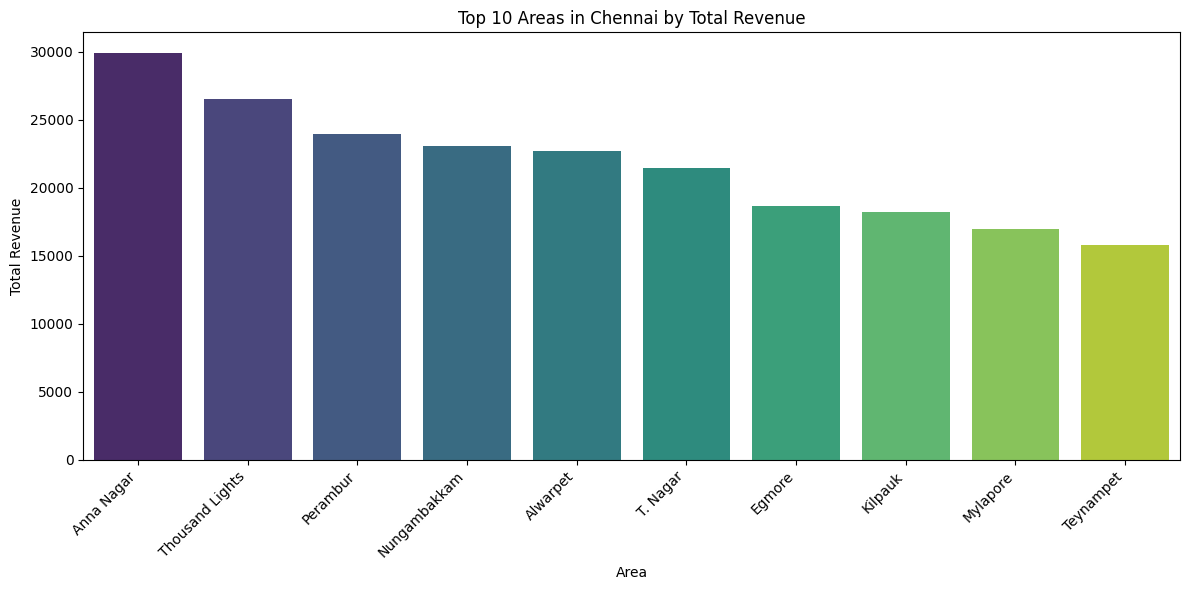

In [ ]:
# Sort by Total_Revenue in descending order and get the top 10
top_10_areas = chennai_area_stats.sort_values(by='Total_Revenue', ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x='Area', y='Total_Revenue', data=top_10_areas, palette='viridis')
plt.title('Top 10 Areas in Chennai by Total Revenue')
plt.xlabel('Area')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
## Top 10 restaurants by revenue in anna nagar

anna_nagar_restaurants = chennai_df[chennai_df['Area'] == 'Anna Nagar'].drop_duplicates(subset='Restaurant')
top_10_restaurants = anna_nagar_restaurants.sort_values(by='Price', ascending=False).head(10)
top_10_restaurants

,ID,Area,City,Restaurant,Price,Avg ratings,Total ratings,Food type,Address,Delivery time
481,19917,Anna Nagar,Chennai,Asian Station,1400.0,4.5,100,Asian,Croma Building,66
4012,364331,Anna Nagar,Chennai,The Living Room,1200.0,4.5,50,"South Indian,North Indian,Tandoor,Mediterranea...",Annanagar,68
989,44261,Anna Nagar,Chennai,Urban Spatula,1000.0,4.3,100,"Arabian,Asian,Biryani,Continental,Italian,Keba...",Annanagar,80
3997,363011,Anna Nagar,Chennai,Habibi,900.0,4.1,20,"Arabian,Barbecue,Afghani,Combo,Greek,Grill",Annanagar,72
294,11316,Anna Nagar,Chennai,Mainland China,850.0,4.3,500,"Chinese,Oriental,Thai,Pan-Asian,Seafood,Asian,...",5Th Avenue,72
319,13008,Anna Nagar,Chennai,Pantry D'Or,850.0,4.2,100,"Italian,Continental",6Th Avenue Main Road,65
3198,314563,Anna Nagar,Chennai,Asia Kitchen By Mainland China,850.0,4.4,20,"Asian,Chinese,Oriental",5Th Avenue,76
259,10275,Anna Nagar,Chennai,Kim Ling,800.0,4.4,500,Chinese,Teja Tower,64
1448,80398,Anna Nagar,Chennai,Rosewater,800.0,4.2,20,"Indian,Chinese,Continental,Asian",Anna Nagar East,73
462,19000,Anna Nagar,Chennai,Cafe Arabica,700.0,4.4,500,"Italian,Continental,Arabian,Bakery",Anna Nagarr,60


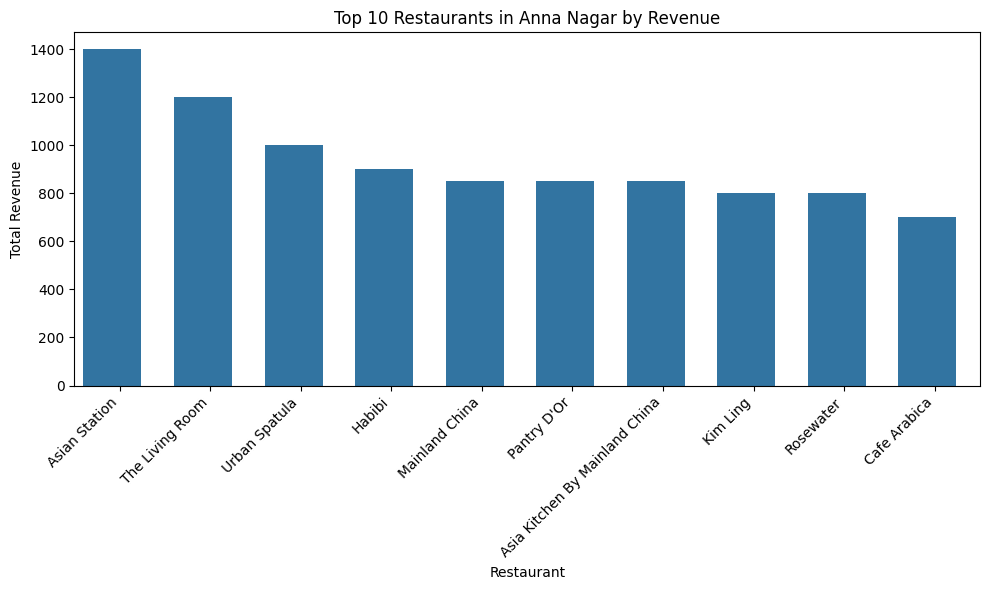

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Sort the dataframe by 'Avg ratings' in descending order
sorted_df = top_10_restaurants.sort_values('Price', ascending=False)

# Create the bar chart with increased bar width using seaborn
plt.figure(figsize=(10, 6))  # Adjust figure size if needed
ax = sns.barplot(x='Restaurant', y='Price', data=sorted_df)

# Customize bar width
width_scale = 0.8
for bar in ax.patches:
    bar.set_width(bar.get_width() * width_scale)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Add title and labels
plt.title('Top 10 Restaurants in Anna Nagar by Revenue')
plt.xlabel('Restaurant')
plt.ylabel('Total Revenue')

# Display the chart
plt.tight_layout()
plt.show()


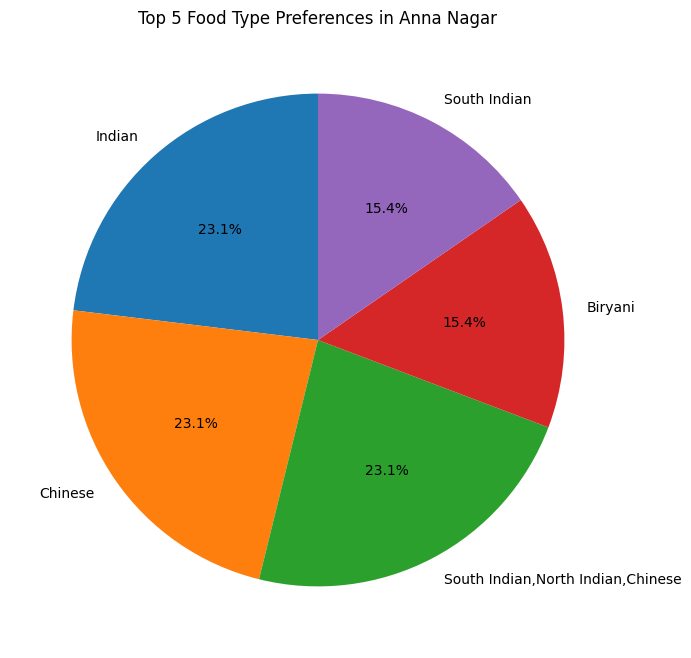

In [ ]:
## Highest Food Type Preferences (Top 5) in Anna Nagar (Pie Chart)

# Filter data for Anna Nagar
anna_nagar_df = chennai_df[chennai_df['Area'] == 'Anna Nagar']

# Get top 5 food type preferences
food_preferences = anna_nagar_df['Food type'].value_counts().head(5)

# Create pie chart
plt.figure(figsize=(8, 8))  # Adjust figure size as needed
plt.pie(food_preferences, labels=food_preferences.index, autopct='%1.1f%%', startangle=90)
plt.title('Top 5 Food Type Preferences in Anna Nagar')
plt.show()

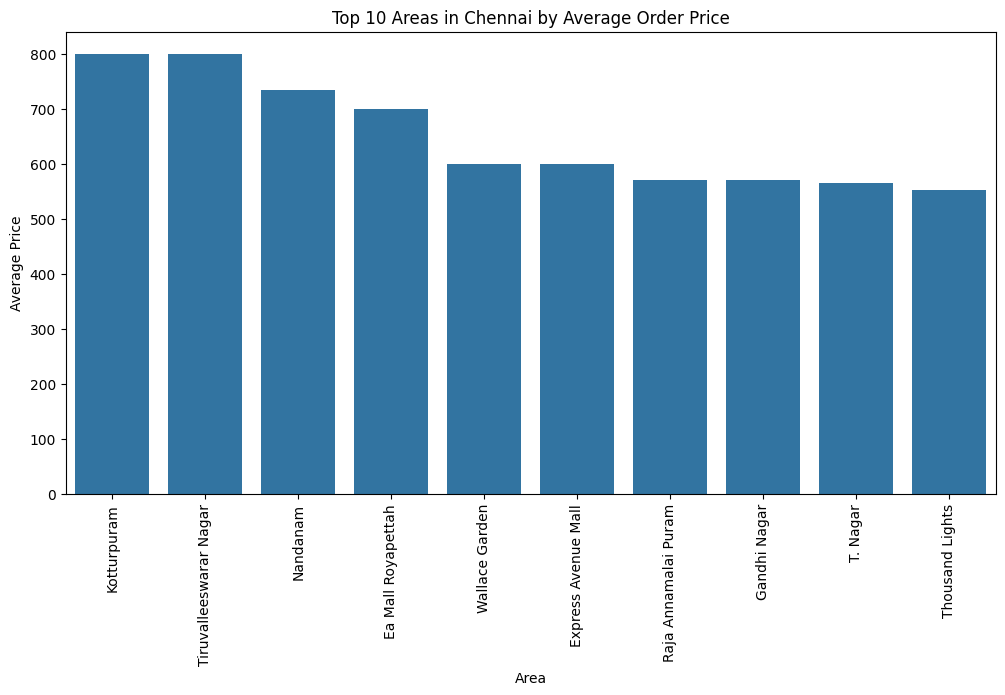

In [ ]:
## Top 10 Areas on Chennai By Price Distribution

# Calculate average order price by area
area_price_distribution = chennai_df.groupby('Area')['Price'].mean().sort_values(ascending=False).head(10)

# Create a bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x=area_price_distribution.index, y=area_price_distribution.values)
plt.title('Top 10 Areas in Chennai by Average Order Price')
plt.xlabel('Area')
plt.ylabel('Average Price')
plt.xticks(rotation=90)
plt.show()

In [ ]:
## top 10 Restaurants in Kotturpuram

kotturpuram_restaurants = chennai_df[chennai_df['Area'] == 'Kotturpuram'].drop_duplicates(subset='Restaurant')
top_10_restaurants = kotturpuram_restaurants.sort_values(by='Price', ascending=False).head(10)
top_10_restaurants

,ID,Area,City,Restaurant,Price,Avg ratings,Total ratings,Food type,Address,Delivery time
190,8139,Kotturpuram,Chennai,Ciclo Cafe,1100.0,4.4,1000,"Continental,Italian,Italian-American",Alwarpet,71
2647,253448,Kotturpuram,Chennai,Pizzeria By Ciclo,500.0,4.1,50,Pizzas,Kotturpuram,74


**OBSERVATION:**


This is much clear for us to tell that Kotturpuram has the highest priced option with more ratings as most of the deliveries within this area is too less and people might prefer other options like zomato or uber eats where for a normal person it is more amount and services for swiggy should take necessary actions to develop more swiggy options than before. Delivery timings are taken more which will alove the consumer to prefer other mode of choices than swiggy.

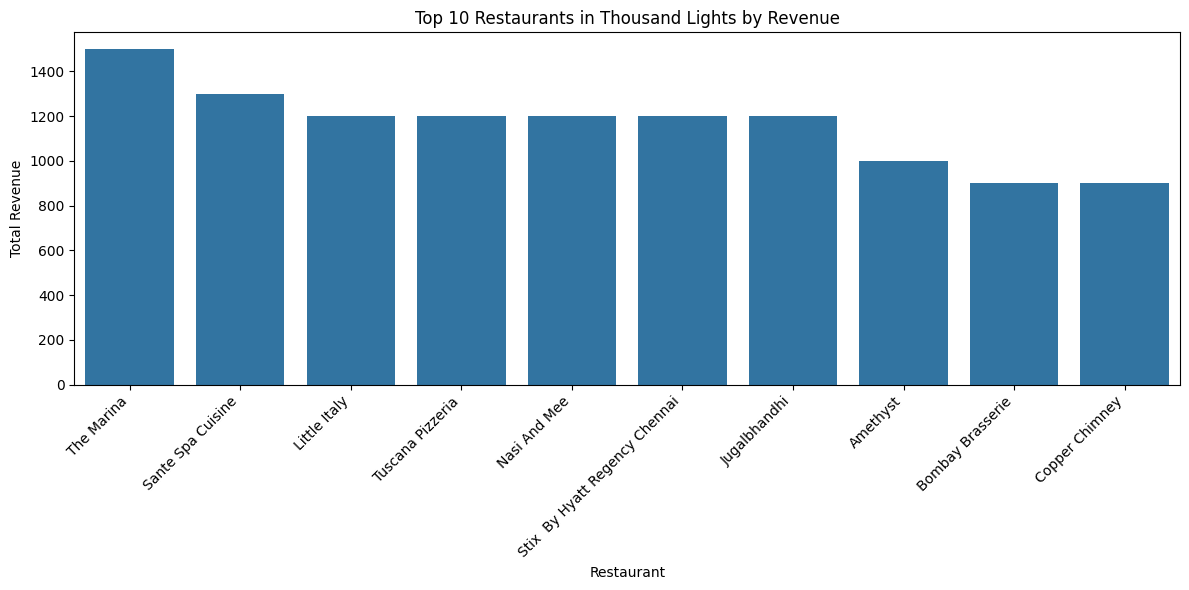

In [ ]:
## top 10 Restaurants in Thousand Lights

# Filter data for Thousand Lights
thousand_lights_df = chennai_df[chennai_df['Area'] == 'Thousand Lights']

# Calculate total revenue for each restaurant
restaurant_revenue = thousand_lights_df.groupby('Restaurant')['Price'].sum().reset_index()

# Sort restaurants by revenue in descending order and select top 10
top_10_restaurants = restaurant_revenue.sort_values(by='Price', ascending=False).head(10)

# Create bar graph using Seaborn
plt.figure(figsize=(12, 6))  # Adjust figure size as needed
sns.barplot(x='Restaurant', y='Price', data=top_10_restaurants)
plt.title('Top 10 Restaurants in Thousand Lights by Revenue')
plt.xlabel('Restaurant')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

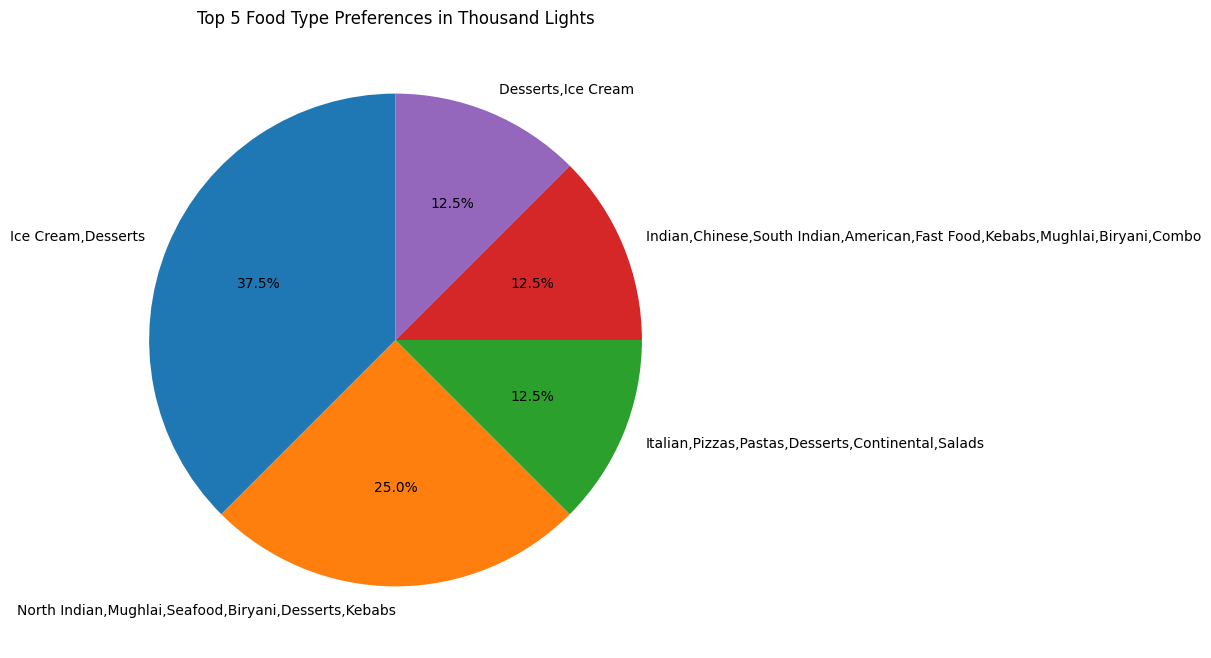

In [ ]:
## Highest Food Type Preference in thousand Lights

# Get top 5 food type preferences
food_preferences = thousand_lights_df['Food type'].value_counts().head(5)

# Create pie chart
plt.figure(figsize=(8, 8))  # Adjust figure size as needed
plt.pie(food_preferences, labels=food_preferences.index, autopct='%1.1f%%', startangle=90)
plt.title('Top 5 Food Type Preferences in Thousand Lights')
plt.show()

**OBSERVATION:**

Thousand Lights is a place for more options on Desserts and Ice Creams this can be due to its ambience within that area as most of couples can have a night here with their specials like Pizza, Salads, etc having a porsche experience within a medium range which will attract the new generations with their choices at a minimal rate.

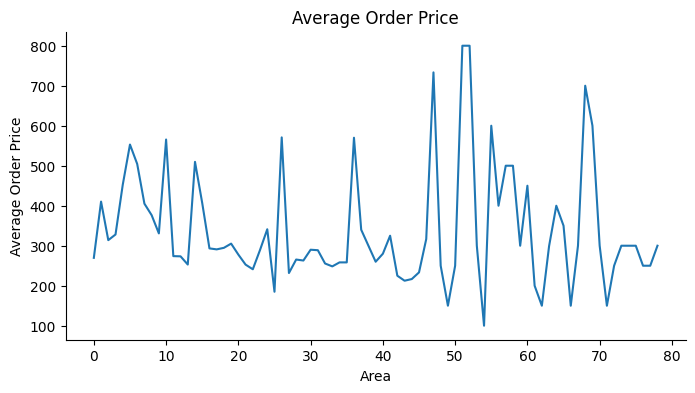

In [ ]:
# Plotting
chennai_area_stats['Average_Order_Price'].plot(kind='line', figsize=(8, 4), title='Average Order Price')

# Customizing axes
plt.xlabel("Area")  # Setting x-axis label
plt.ylabel("Average Order Price")  # Setting y-axis label

# Removing top and right spines
plt.gca().spines[['top', 'right']].set_visible(False)

# Display the plot
plt.show()

In [ ]:
## Give top 10 restaurants by revenue in Chennai

top_10_restaurants = df[df['City'] == 'Chennai'].drop_duplicates(subset='Restaurant')
top_10_restaurants = anna_nagar_restaurants.sort_values(by='Price', ascending=False).head(10)
top_10_restaurants

,ID,Area,City,Restaurant,Price,Avg ratings,Total ratings,Food type,Address,Delivery time
3079,306434,Mylapore,Chennai,Malgudi - The Savera Hotel,2500.0,4.1,50,"North Indian,South Indian",Mylapore,62
800,34312,T. Nagar,Chennai,Chin Chin - The Residency,1900.0,4.3,50,Chinese,T. Nagar,72
283,10834,T. Nagar,Chennai,Basil With A Twist,1500.0,4.1,50,"Continental,European,Salads,Italian",Habibullah Road,63
338,14108,Alwarpet,Chennai,Sushi In A Box,1500.0,4.4,100,Japanese,Alwarpet,64
4507,385802,T Nagar,Chennai,Dank,1500.0,2.9,80,Continental,T Nagar,77
242,9850,Thousand Lights,Chennai,The Marina,1500.0,4.4,100,Seafood,Nugambakkam,49
482,19927,Teynampet,Chennai,New Seoul,1500.0,4.3,20,"Japanese,Korean",406 3Rd Floor,64
6597,19004,Nungambakkam,Chennai,Cream Centre,1500.0,4.4,100,"North Indian,Italian,Mexican",Nungambakkam,51
840,37039,Vadapalani,Chennai,Salt Indian Restaurant & Grill,1500.0,4.1,100,"North Indian,Biryani,Combo",Forum Mall,84
181,7826,Alwarpet,Chennai,Benjarong,1500.0,4.6,100,Thai,Ttk Road,68


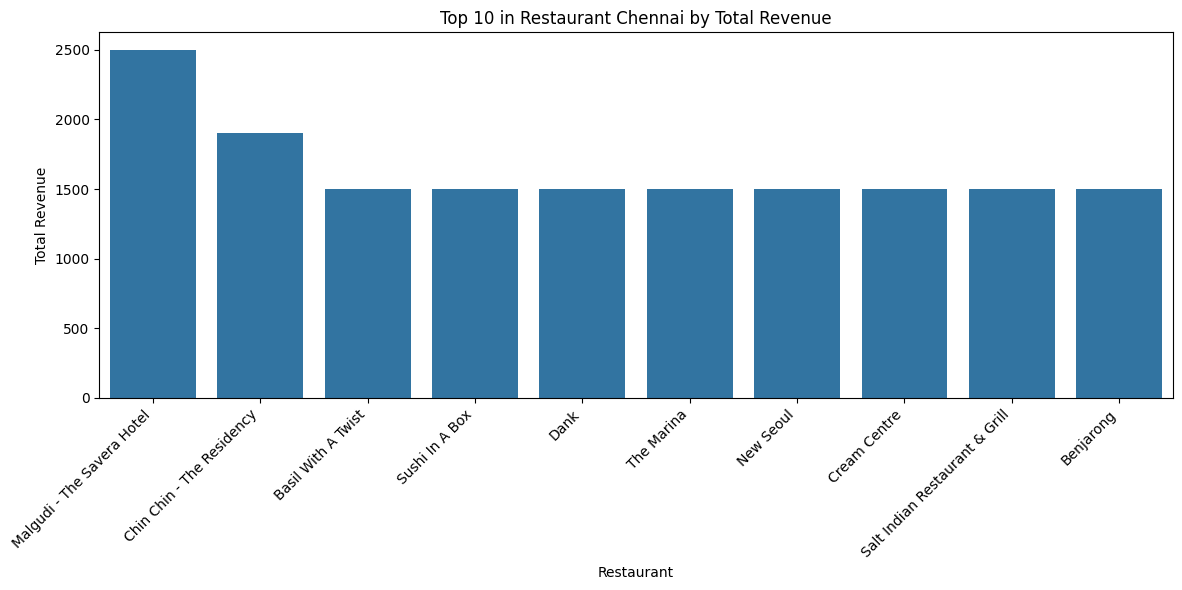

In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Restaurant', y='Price', data=top_10_restaurants)  # Updated data and y-axis
plt.title('Top 10 in Restaurant Chennai by Total Revenue')
plt.xlabel('Restaurant')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

**OBSERVATION:**

There are restaurants like Malgudi and Chin Chin in Mylapore and T Nagar with a moderate number of customers and earn a more revenue than restaurants in Perambur and Anna Nagar.
The reason is because that Perambur and Anna Nagar have more diversed outlets due to its more different indian cultures as most of them here are IT Proffessionals including the college going students which are residing in apartments so many different types of restaurants will be here indicating more sales within that area even though restaurants are profitably gaining lesser from the customers.

<ipython-input-83-acb8ddb4f41b>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chennai_df['Delivery Category'] = pd.cut(chennai_df['Delivery time'], bins=bins, labels=labels, right=False)
<ipython-input-83-acb8ddb4f41b>:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  delivery_category_counts = chennai_df.groupby('Delivery Category')['ID'].count()
<ipython-input-83-acb8ddb4f41b>:24: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps

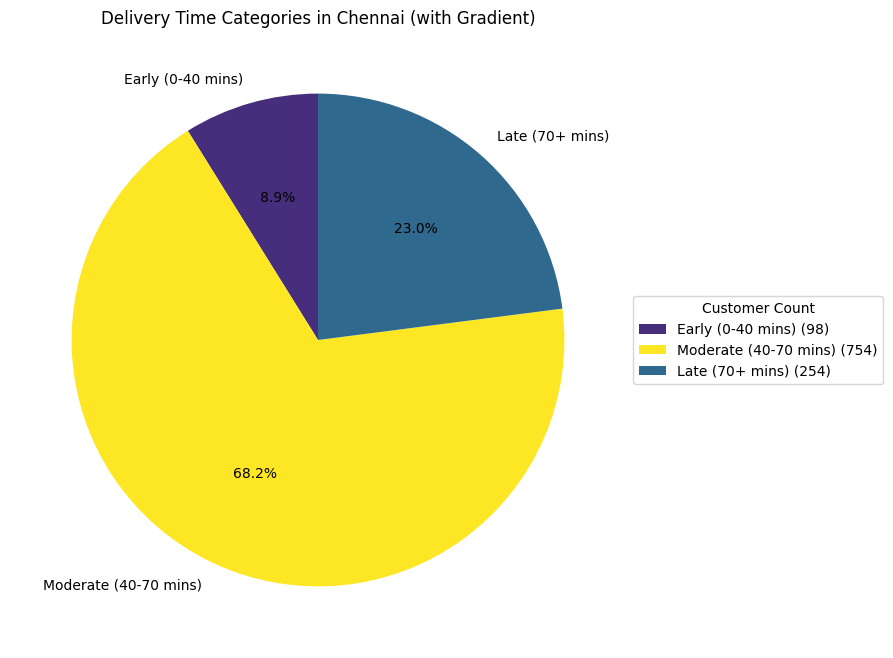

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

# Filter data for Chennai
chennai_df = df[df['City'] == 'Chennai']

# Define bins for delivery time categorization
bins = [0, 40, 70, 200]  # Example bins (adjust as needed)
labels = ['Early (0-40 mins)', 'Moderate (40-70 mins)', 'Late (70+ mins)']

# Create the 'Delivery Category' column
chennai_df['Delivery Category'] = pd.cut(chennai_df['Delivery time'], bins=bins, labels=labels, right=False)

# Group data for pie chart and get customer ID counts
delivery_category_counts = chennai_df.groupby('Delivery Category')['ID'].count()

# Normalize customer counts for color gradient
max_count = delivery_category_counts.max()
normalized_counts = delivery_category_counts / max_count

# Create a colormap object
cmap = cm.get_cmap('viridis')  # Choose your desired colormap

# Get colors based on normalized counts
colors = cmap(normalized_counts)

# Create pie chart with gradient colors and legend
plt.figure(figsize=(8, 8))
wedges, texts, autotexts = plt.pie(delivery_category_counts, labels=delivery_category_counts.index,
                                  autopct='%1.1f%%', startangle=90, colors=colors)

# Create legend labels
legend_labels = [f'{label} ({count})' for label, count in zip(delivery_category_counts.index, delivery_category_counts)]

# Add legend
plt.legend(wedges, legend_labels, title='Customer Count', loc='center left', bbox_to_anchor=(1, 0, 0.5, 1))

plt.title('Delivery Time Categories in Chennai (with Gradient)')
plt.show()

**OBSERVATION:**

We can see that most of the orders are within 1 hour which is due to more population in its heart of the city like Perambur, Thousand Lights and Anna Nagar due to its more traffic congestions and most of these will be in the time period of 1pm - 3pm as there are most of the IT proffessionals doing work from home ensuring more demands for food delivery during these time and more sales turnover being uplifted is due to its more customers in afternoon being immense and profitable for the firm.

Late can be due to status updation factors like the previous order lag which can be a huge headache for the delivery boys . Also cancelling the order prior of the delivery will reroute the time schemes to the next person which can be hectic for the delivery person on coordinationg with its sales team. These are usually lesser in these areas which will be overcome quicker than usual when the firm gains its feedbacks, proper statergies can eradicate or reduce this to a point.

Also, deliveries to areas which are bit hilly and remote need a proper speed limit this is also one reason.

Zero-Pay Policy is also being adopted in these areas for more reliability and accuracy within the next delivery assurance which can inturn affect the sales turnover as productivity increases the revenue on firm will cause into deficit.

<ipython-input-67-a91898b844a1>:18: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  customer_counts = df.groupby('Price Category')['ID'].count()


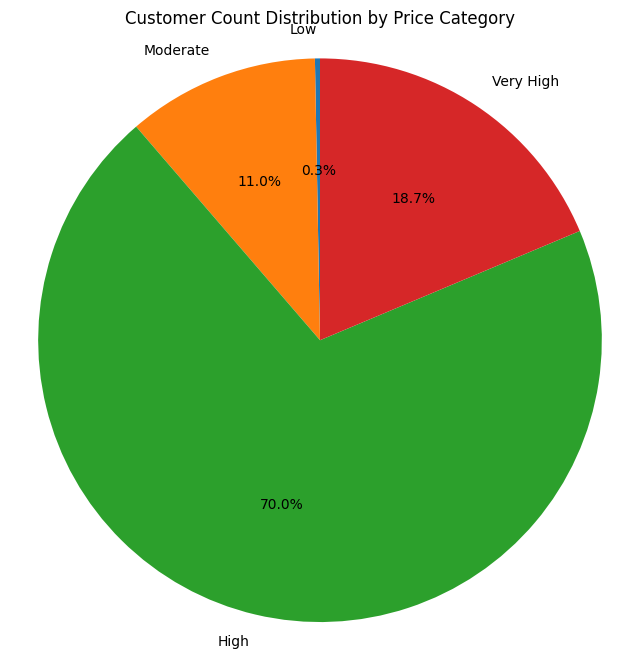

In [ ]:
#Categorize the price based on 'Very High', 'High','Moderate','Low' by customer count

import pandas as pd
import matplotlib.pyplot as plt

price_bins = [0, 50, 200, 500, float('inf')]  # Example price bins
price_labels = ['Low', 'Moderate', 'High', 'Very High']

df['Price Category'] = pd.cut(df['Price'], bins=price_bins, labels=price_labels, right=False)

customer_counts = df.groupby('Price Category')['ID'].count()

# Create the pie chart
plt.figure(figsize=(8, 8))  # Adjust figure size as needed
plt.pie(customer_counts, labels=customer_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Customer Count Distribution by Price Category')
plt.axis('equal') # Equal aspect ratio ensures the pie chart is circular
plt.show()

**OBSERVATION**:

Customers are more into High Priced items with will give more quantity and quality and for more distant places they order more as Waiting time more which is positively proportional.

## QUALITY ASSUARANCE BASED ON RATINGS

<ipython-input-71-c13d53cdf707>:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  customer_counts = df.groupby('Rating Category')['ID'].count()


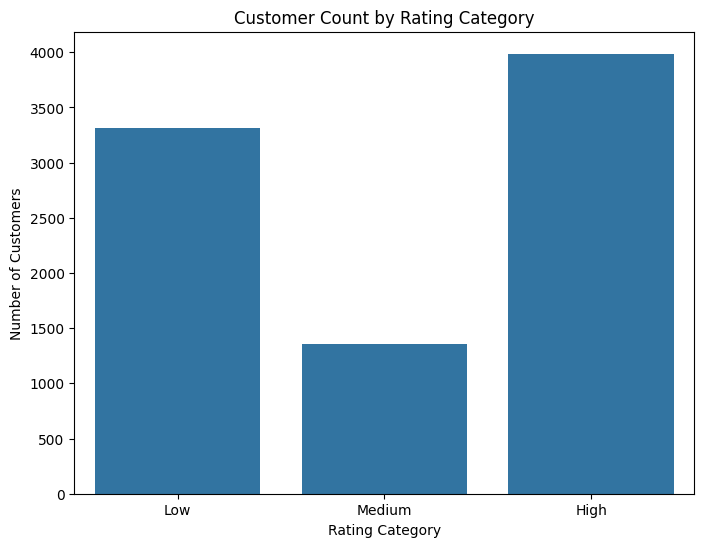

In [ ]:
# prompt: Checking Rating on Customer ID count by Categorizing on 'High', 'medium' and 'Low' on bar chart

import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'df' is your DataFrame and it contains 'ID' and 'Avg ratings' columns

# Define rating categories and bins
rating_bins = [0, 3, 4, 5]
rating_labels = ['Low', 'Medium', 'High']

# Create a new column 'Rating Category'
df['Rating Category'] = pd.cut(df['Avg ratings'], bins=rating_bins, labels=rating_labels, right=False)

# Count customer IDs for each rating category
customer_counts = df.groupby('Rating Category')['ID'].count()

# Create the bar chart
plt.figure(figsize=(8, 6))
sns.barplot(x=customer_counts.index, y=customer_counts.values)
plt.title('Customer Count by Rating Category')
plt.xlabel('Rating Category')
plt.ylabel('Number of Customers')
plt.show()

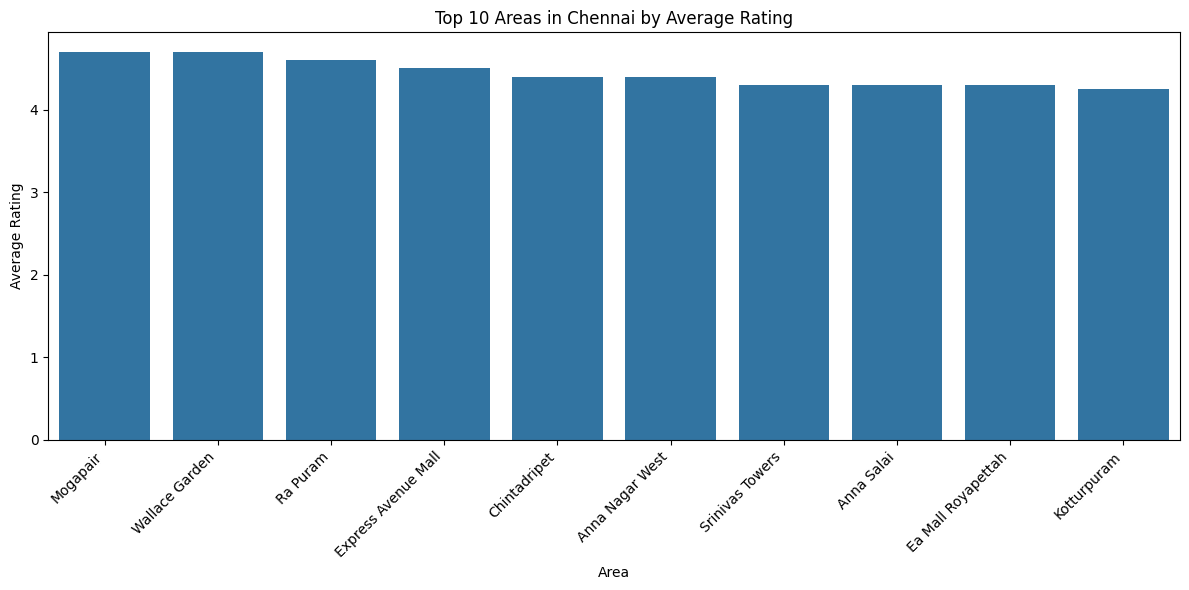

In [ ]:
# Filter data for Chennai
chennai_df = df[df['City'] == 'Chennai']

# Group by area and calculate the average rating
area_avg_ratings = chennai_df.groupby('Area')['Avg ratings'].mean()

# Sort areas by High average rating in descending order and get the top 10
top_10_areas = area_avg_ratings.sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_10_areas.index, y=top_10_areas.values)
plt.title('Top 10 Areas in Chennai by Average Rating')
plt.xlabel('Area')
plt.ylabel('Average Rating')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

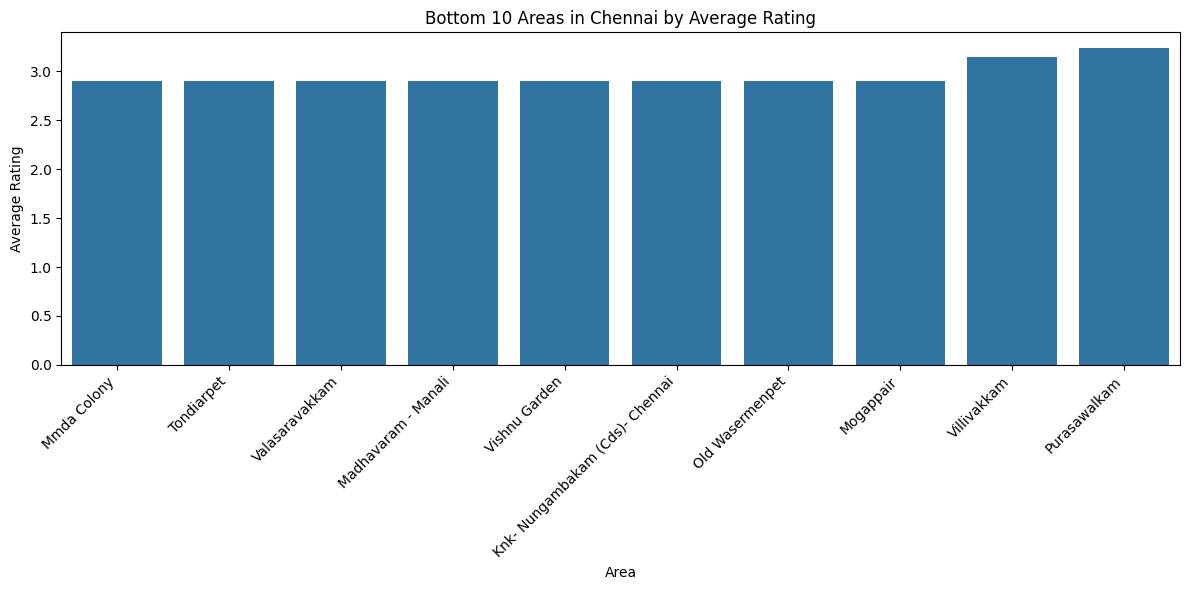

In [ ]:
# Filter data for Chennai
chennai_df = df[df['City'] == 'Chennai']

# Group by area and calculate the average rating
area_avg_ratings = chennai_df.groupby('Area')['Avg ratings'].mean()

# Sort areas by average rating in ascending order and get the top 10
bottom_10_areas = area_avg_ratings.sort_values(ascending=True).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=bottom_10_areas.index, y=bottom_10_areas.values)
plt.title('Bottom 10 Areas in Chennai by Average Rating')
plt.xlabel('Area')
plt.ylabel('Average Rating')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

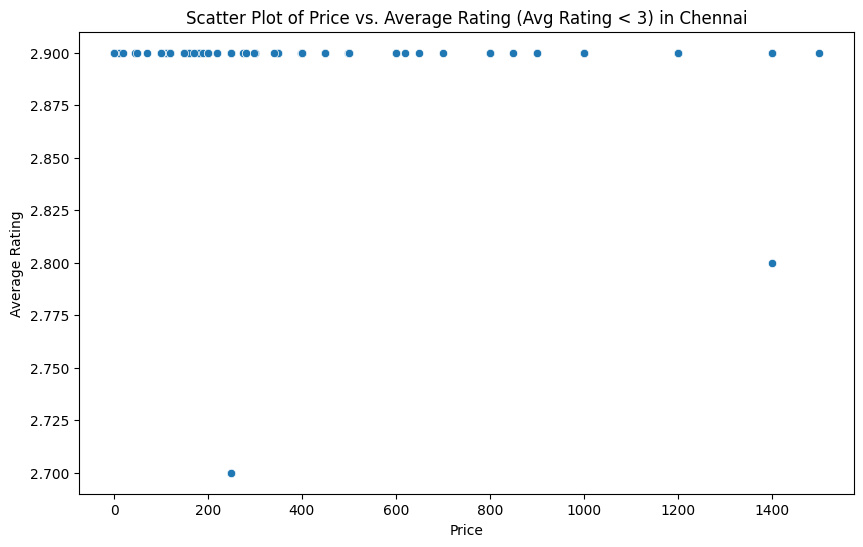

In [ ]:
# Filter data for Chennai and average ratings less than 3
chennai_low_rated_df = df[(df['City'] == 'Chennai') & (df['Avg ratings'] < 3)]

# Create the scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Price', y='Avg ratings', data=chennai_low_rated_df)
plt.title('Scatter Plot of Price vs. Average Rating (Avg Rating < 3) in Chennai')
plt.xlabel('Price')
plt.ylabel('Average Rating')
plt.show()

- **OBSERVATIONS:**

1. The quality of the food on different restaurants are done by various ratings where the restaurant can improve their ways of service and bring proper cuisines based on customer choices.

2. In the analysis, its seen that areas like Mogapair, Wallace Garden and Kotturpuram etc are having a great food choice but this retaurants are not earning more revenue than areas like Perambur, Thousand Lights and Anna Nagar.

3. On Ratings, High Ratings are predominately high which a good remark for the groing city like Chennai and can leverage its production process by increasing its new customizing trends based on the people culture and locality.

4. Also, Low Ratings is also just below which is mostly due to its service quality as most of the traffic areas in Chennai. Which has been performed throughout the analysis.

- **IMPROVEMENTS & RECOMMENDATIONS:**

1. Swiggy have to emerge changes in the delivery stratergies like try using more Optimization techniques by making the app mode more interactive and dynamic on bringing more vacant areas to cover the areas without traffic which will equip the places with more traffic like Perambur, Thousand Lights also Kotturpuram, the least number of orders in this areas are due to its availabity of services within those areas try to collaborate with other restaurants and keep more logistic supply-chains for more quick delivery within these regions.

2. App developers should maximum change the UI interaction with more customer preferences by using Business Mode on quicker delivery status. Also this should indeed with the marketing team and sales coordinators for reliability and accountability within the service. Or else people will choose more of other apps like Zomato, Uber Eats, etc as its can satisfy the customer preferences which will boost up their sales returns by making our production affect the overall firm growth and which will lead to more losses.

3. Try to Put awarness campaigns in more lesser sales done areas for promoting the culture of online orders to backward and Older Families. Make the sales team to have constant contact with these type of consumers for more input within their hands.

4. ***STATERGY TO BE FOLLOWED:***

- One To One: Customer relations with Company which is normal delivery pattern

- One to Many: Customer relations with Company for trying to help them optimize the stratergy on Organizational Behaviour towards the customers and what all attributes can be added for more better delivery schemes and time accuracy.

5. Feedbacks that have been got from the customers should be taken and see through various aalytics like sentiment and NLP by analyst to understand customers more grievances as per rating done by them which will be a Many - to - One Approach where the Company uses techniques like Involve more recruitemnt within that lower productivity of sales on areas of Chennai like Kotturpuram for better quality within areas of Chennai. This will help the swiggy on its drawbacks and approaching methods can be adopted through these people as they are well known with the locality.
